In [27]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [9]:
def master_df(chamber):
    master = pd.DataFrame()
    fpath='../congress-data/%s/' % chamber
    files=os.listdir(fpath)
    for file in files:
        
        congress = int(file.split('_')[1].split('.')[0])
        df = pd.read_csv(fpath + file, index_col=0, parse_dates=['dob'])
        df['congress'] = congress
        
        master = master.append(df, ignore_index=True)
    
    return master

In [42]:
def add_age(df):
    dates = {101 : '01-01-1991',
         102 : '01-01-1993',
         103 : '01-01-1995',
         104 : '01-01-1997',
         105 : '01-01-1999',
         106 : '01-01-2001',
         107 : '01-01-2003',
         108 : '01-01-2005',
         109 : '01-01-2007',
         110 : '01-01-2009',
         111 : '01-01-2011',
         112 : '01-01-2013',
         113 : '01-01-2015',
         114 : '01-01-2017',
         115 : '01-01-2019',
         116 : '01-01-2021'}
    
    ages = []
    for idx, row in df.iterrows():
        cong = row['congress']
        date = dates[cong]
        age = (datetime.strptime(date, '%d-%m-%Y') - row['dob']).days / 365.25
        ages.append(age)
        
    df['age'] = ages
    return df

In [43]:
house = add_age(master_df('house'))
senate = add_age(master_df('senate'))

In [50]:
house = house[house['leadership_role'] != 'Speaker of the House']

sessions_to_ids = {102: ['G000321', 'H000206', 'K000146'],
                   106: ['M000303'],
                   110: ['M000303', 'B000444', 'B000953', 'C001041', 'D000388', 'O000167'],
                   108: ['E000286', 'G000352', 'K000148', 'L000304'],
                   114: ['C001098', 'R000595', 'S000033', 'G000359'],
                   116: ['S000033', 'B001267', 'B001288', 'G000555', 'H001075', 'K000367', 'W000817']}

to_drop = []
for key in sessions_to_ids.keys():
    c = senate[senate['congress'] == key]
    index = c[c['id'].isin(sessions_to_ids[key])].index
    to_drop.extend(index)

senate = senate[~senate.index.isin(to_drop)]

## Age EDA

Text(0.5, 1.0, 'Age vs. Missed Votes - House')

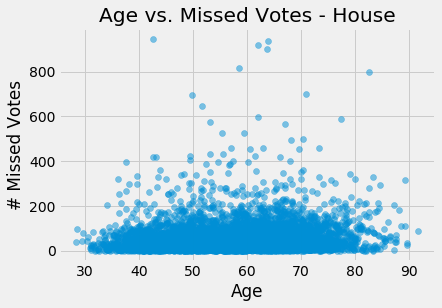

In [54]:
fig, ax = plt.subplots()
ax.scatter(house['age'], house['missed_votes'], alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('# Missed Votes')
ax.set_title('Age vs. Missed Votes - House')

Text(0.5, 1.0, 'Age vs. Missed Votes - Senate')

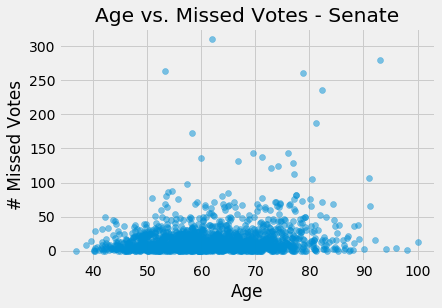

In [55]:
fig, ax = plt.subplots()
ax.scatter(senate['age'], senate['missed_votes'], alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('# Missed Votes')
ax.set_title('Age vs. Missed Votes - Senate')

### Conclusion:
No obvious trend here. Not worth doing an analysis

## Seniority

Text(0.5, 1.0, 'Seniority vs. Missed Votes - House')

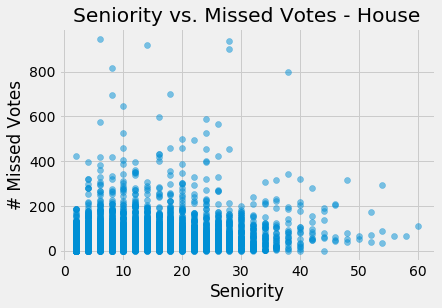

In [56]:
fig, ax = plt.subplots()
ax.scatter(house['seniority'], house['missed_votes'], alpha=0.5)

ax.set_xlabel('Seniority')
ax.set_ylabel('# Missed Votes')
ax.set_title('Seniority vs. Missed Votes - House')

Text(0.5, 1.0, 'Age vs. Missed Votes - Senate')

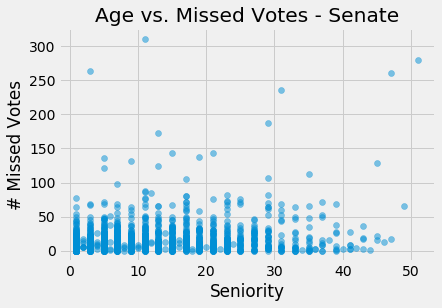

In [58]:
fig, ax = plt.subplots()
ax.scatter(senate['seniority'], senate['missed_votes'], alpha=0.5)
ax.set_xlabel('Seniority')
ax.set_ylabel('# Missed Votes')
ax.set_title('Age vs. Missed Votes - Senate')

### Conclusion:
No obvious trend here, not worth doing further analysis